## Sign Language Classification

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import os 
import cv2

In [3]:
DATA_DIR = "./data"

In [4]:
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

In [5]:
# no_of_classes = 26
# dataset_size = 50

## Capturing Images

In [6]:
# cap = cv2.VideoCapture(0)
# for j in range(no_of_classes):
#     if not os.path.exists(os.path.join(DATA_DIR, str(j))):
#         os.makedirs(os.path.join(DATA_DIR, str(j)))

#     print(f"Collecting Data for class {j}")

#     done = False
#     while True:
#         ret, frame = cap.read()
#         cv2.putText(frame, "Ready? Press 'Q'" , (100,50), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
#         cv2.imshow("frame", frame)
        
#         if cv2.waitKey(25) == ord("q"):
#             break

#     counter = 0
#     while counter < dataset_size:
#         ret, frame = cap.read()
#         cv2.imshow("frame", frame)
#         cv2.waitKey(25)
#         cv2.imwrite(os.path.join(DATA_DIR, str(j), f"{counter}.jpg"), frame)

#         counter += 1

# cap.release()
# cv2.destroyAllWindows()

## Creating Dataset from the images collected

In [7]:
%pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [8]:
from mediapipe import solutions

In [9]:
mp_hands = solutions.hands
mp_drawing = solutions.drawing_utils
mp_drawing_styles = solutions.drawing_styles

In [10]:
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

In [11]:
data = []
labels = []

for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(dir_)

In [12]:
import pickle

In [13]:
f = open("data.pickle", "wb")
pickle.dump({"data":data, "labels": labels}, f)
f.close()

## Splitting the data into training and testing

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [15]:
data_dict = pickle.load(open("./data.pickle", "rb"))

data = np.asarray(data_dict["data"])
labels = np.asarray(data_dict["labels"])

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.2, stratify=labels, shuffle=True)

In [17]:
xtrain.shape

(1040, 42)

In [18]:
xtest.shape

(260, 42)

### Training the model

In [19]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

### Model evaluation

In [20]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [21]:
train_accuracy = accuracy_score(ytrain,ypred_train)
test_accuracy = accuracy_score(ytest, ypred_test)

print("train accuracy: ", train_accuracy)
print("test accuracy: ", test_accuracy)

train accuracy:  1.0
test accuracy:  1.0


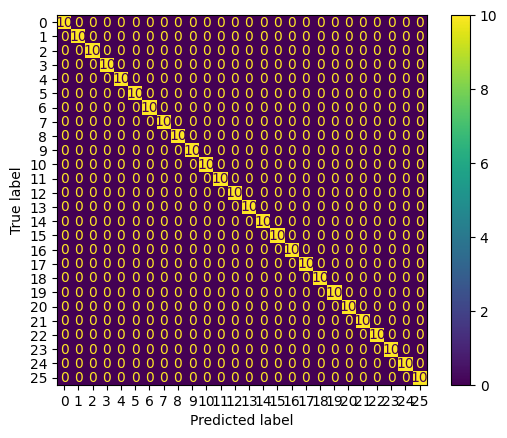

In [22]:
cf = confusion_matrix(ytest,ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [23]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00      1.00      1.00        10
          19       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
          20       1.00      1.00      1.00        10
          21       1.00      1.00      1.00        10
          22       1.00      1.00      1.00        10
          23       1.00      1.00      1.00        10
          24       1.00    

In [24]:
f = open("model.p", "wb")
pickle.dump({"model" : model}, f)
f.close()

In [25]:
model_dict = pickle.load(open("./model.p", "rb"))
model = model_dict["model"]

In [26]:
cap = cv2.VideoCapture(0)

In [27]:
labels_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4:'E', 5: 'F', 6: 'G', 7:'H', 8: 'I', 9:'J', 10:'K'
                , 11:'L', 12: 'M', 13:'N', 14: 'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U'
                ,21:'V', 22: 'W', 23: 'X', 24:'Y', 25: 'Z'}

In [28]:
predicted_list = []
final_predictions = []

while True:

    check = True

    while check:
        data_aux = []
        x_ = []
        y_ = []

        ret, frame = cap.read()

        H,W, _ = frame.shape

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        results = hands.process(frame_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame,                              # image to draw
                                        hand_landmarks,                       # model output
                                        mp_hands.HAND_CONNECTIONS,            # hand connections
                                        mp_drawing_styles.get_default_hand_landmarks_style(),
                                        mp_drawing_styles.get_default_hand_connections_style())
                
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            x1 = int(min(x_) * W) - 10
            y1 = int(min(y_) * H) - 10

            x2 = int(max(x_) * W) - 10
            y2 = int(max(y_) * H) - 10

            prediction = model.predict([np.asarray(data_aux)])

            predicted_char = labels_dict[int(prediction[0])]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0 , 0 , 0), 4)
            cv2.putText(frame, predicted_char, (x1,y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0,0,0), 3, cv2.LINE_AA)

            if len(predicted_list) != 200:
                predicted_list.append(predicted_char)
            else:
                final_predictions.append(predicted_list[-1])
                check = False

        cv2.imshow("frame", frame)
        cv2.waitKey(1000)


    predicted_list.clear()
    cap.release()
    cv2.destroyAllWindows()

print(final_predictions)


KeyboardInterrupt: 

: 